# Lab 5 - Classification :  k-NN and Naive Bayes (using sklearn libraries)

## k-NN

Use **"Pima Indians Diabetes Dataset from UCI Machine Learning Repository"** for this question.It is a binary class dataset. Split the dataset into train(80%), validation(10%) and test sets(10%).

Run k-Nearest neighbours for different k values. Choose your own subset of k (atleast 10) and choose the best value of k from this subset. In solving real-world problems, the values of k are chosen based on experience and hence it is a tunable hyperparameter. Select the k, using validation set, which returns the best accuracy score. Report accuracy score by performing k-NN on the test dataset using the chosen k value. 

In [12]:
# Code here
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


=>k: 1  roc_auc validation: 0.6277777777777778 <==>  roc_auc test: 0.5653846153846155
=>k: 3  roc_auc validation: 0.5651851851851851 <==>  roc_auc test: 0.6830769230769231
=>k: 5  roc_auc validation: 0.5951851851851852 <==>  roc_auc test: 0.691923076923077
=>k: 7  roc_auc validation: 0.6322222222222222 <==>  roc_auc test: 0.6926923076923077
=>k: 11  roc_auc validation: 0.6522222222222221 <==>  roc_auc test: 0.7415384615384616
=>k: 13  roc_auc validation: 0.6622222222222222 <==>  roc_auc test: 0.7815384615384616
=>k: 17  roc_auc validation: 0.7007407407407408 <==>  roc_auc test: 0.7615384615384616
=>k: 19  roc_auc validation: 0.6907407407407407 <==>  roc_auc test: 0.7215384615384616
=>k: 23  roc_auc validation: 0.6907407407407407 <==>  roc_auc test: 0.7015384615384616
=>k: 29  roc_auc validation: 0.6822222222222223 <==>  roc_auc test: 0.7023076923076923

The best value of k :  17
Test score for best value of k using validation set is :  0.7615384615384616


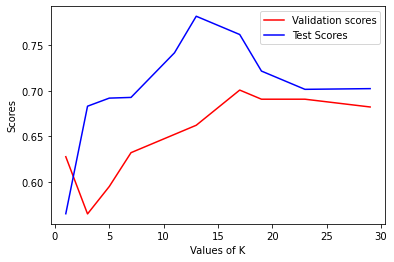

In [20]:
X = data.drop(['Outcome'], axis = 1)
y = data['Outcome']
X_train,X_tr_test,y_train,y_tr_test=train_test_split(X,y,test_size=0.2,random_state=36)
X_val,X_test,y_val,y_test=train_test_split(X_tr_test,y_tr_test,test_size=0.5,random_state=36)

k_set = [1,3,5,7,11,13,17,19,23,29]
validation_scores = []
test_scores = []
for k in k_set:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    labels = knn.predict(X_val)
    validation_score = roc_auc_score(y_val, labels)
    validation_scores.append(validation_score)
    labels = knn.predict(X_test)
    test_score = roc_auc_score(y_test, labels)
    test_scores.append(test_score)

    print(f"=>k: {k}  roc_auc validation: {validation_score} <==>  roc_auc test: {test_score}")

print("\nThe best value of k : ", k_set[validation_scores.index(max(validation_scores))]) 
print("Test score for best value of k using validation set is : ", test_scores[validation_scores.index(max(validation_scores))]) 

plt.plot(k_set, validation_scores, c='red', label='Validation scores')
plt.plot(k_set, test_scores, c='blue', label = 'Test Scores')
plt.xlabel('Values of K');plt.ylabel('Scores');plt.legend()
plt.show()

Summarize your findings and results here

The best value of k :  17

Test score for best value of k using validation set is :  0.7615384615384616


## Naive Bayes

Use **"Optical recognition of handwritten digits dataset"** for this question. ** Download dataset from sklearn**. The dataset has 10 classes and 64 attributes (8x8 images). Visualise images from the dataset. Perform a train test split in the ratio 4:1. 

Naive Bayes - perform multiclass classification to classify the dataset into one of the ten classes. Experiment with the priors (Gaussian and Bernoulli) and report the best prior. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too).



shape of the image dataset matrix (1797, 64)
shape of the image labels matrix: (1797,)


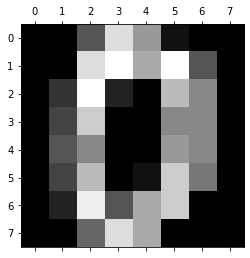

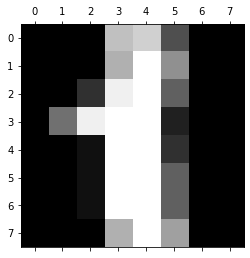

In [28]:
# Code here
from sklearn.datasets import load_digits
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

digits_data = load_digits()
X = digits_data.data
y = digits_data.target

print('shape of the image dataset matrix',X.shape)
print('shape of the image labels matrix:',y.shape)

plt.matshow(digits_data.images[0]) 
plt.matshow(digits_data.images[1])
plt.show()

In [27]:
#Gaussian  Naive Bayes
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=36)
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test)
accuracy = gnb.score(X_test, y_test) 
print("Gaussian Naive Bayes Classifier accuracy : ",accuracy)
print("Gaussian Naive Bayes f1 score : ",f1_score(gnb_predictions,y_test,average='macro'))
cm = confusion_matrix(y_test, gnb_predictions)
cm

Gaussian Naive Bayes Classifier accuracy :  0.8638888888888889
Gaussian Naive Bayes f1 score :  0.8669727745420076


array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 33,  0,  0,  0,  0,  1,  2,  2,  2],
       [ 0,  2, 29,  0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0, 30,  0,  1,  0,  2,  1,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  1,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0,  1, 32,  0],
       [ 0,  0,  0,  4,  1,  1,  0,  6,  3, 23]], dtype=int64)

In [29]:
#Bernoulli naive Bayes
clf = BernoulliNB()
clf.fit(X_train, y_train)
bern_predictions = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print("Bernoulli Classifier accuracy : ",accuracy)
print("Bernoulli f1 score : ", f1_score(bern_predictions,y_test,average='macro'))
cm = confusion_matrix(y_test, gnb_predictions)
cm

Bernoulli Classifier accuracy :  0.8472222222222222
Bernoulli f1 score :  0.8504804596310978


array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 33,  0,  0,  0,  0,  1,  2,  2,  2],
       [ 0,  2, 29,  0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0, 30,  0,  1,  0,  2,  1,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  1,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0,  1, 32,  0],
       [ 0,  0,  0,  4,  1,  1,  0,  6,  3, 23]], dtype=int64)

Summarize your findings and results here

Gaussian Prior has better perfomance than gaussian